In [123]:
from sklearn import datasets
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

X, y = datasets.load_diabetes(as_frame=True, return_X_y=True)

data = pd.merge(X, y, left_index=True, right_index=True)

clf = IsolationForest()
clf.fit(data)

data['anomaly'] = clf.predict(data)
data = data[data.anomaly == 1]
data = data.drop(columns='anomaly')
data.shape

X = data.drop('target', axis=1)
y = data['target']

RMSE_test: 59.289414281355484
RMSE_train: 62.64996122584783
R2: 0.17724302848924
MAE_test: 50.47566514447978
MAE_train: 52.76781945012178


(25.0, 350.0)

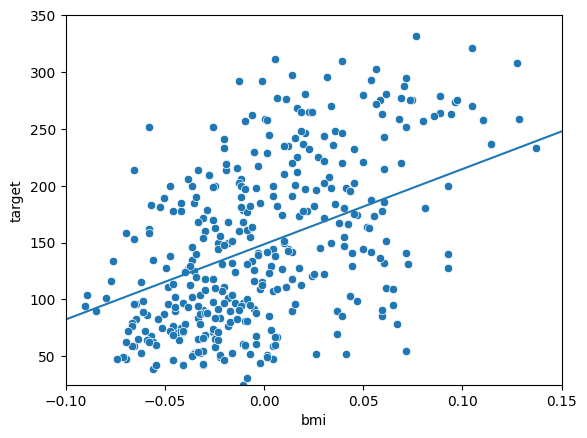

In [124]:
'''
L2-регуляризация линейная (зависимость RMSE от alpha)
'''

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X['bmi'], y, test_size=0.2, random_state=42)

model = Ridge(alpha=0).fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))

y_pred_test = model.predict(X_test.to_numpy().reshape(-1, 1))
y_pred_train = model.predict(X_train.to_numpy().reshape(-1, 1))

# RMSE = root_mean_squared_error(y_test, y_pred_test)
RMSE_list = [root_mean_squared_error(y_test, y_pred_test)]
alpha_list = []
alpha_min = None
for a in np.linspace(0, 1, 100):
    model = Ridge(alpha=a).fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))
    y_pred_test = model.predict(X_test.to_numpy().reshape(-1, 1))
    RMSE = root_mean_squared_error(y_test, y_pred_test)
    RMSE_list.append(RMSE)
    alpha_list.append(a)
    if RMSE > RMSE_list[-2]:
        alpha_min = a
        break

model = Ridge(alpha=alpha_min).fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))
y_pred_test = model.predict(X_test.to_numpy().reshape(-1, 1))
y_pred_train = model.predict(X_train.to_numpy().reshape(-1, 1))

print(f'RMSE_test: {root_mean_squared_error(y_test, y_pred_test)}')
print(f'RMSE_train: {root_mean_squared_error(y_train, y_pred_train)}')
print(f'R2: {r2_score(y_test, y_pred_test)}')
print(f'MAE_test: {mean_absolute_error(y_test, y_pred_test)}')
print(f'MAE_train: {mean_absolute_error(y_train, y_pred_train)}')

import seaborn as sns

sns.scatterplot(x=X['bmi'], y=y)

l = np.linspace(-1.8, 1.5, 100).reshape(-1, 1)

y_new = model.predict(l)

sns.lineplot(x=l.ravel(), y=y_new.ravel())
plt.xlim(-0.1, 0.15)
plt.ylim(25, 350)

In [125]:
'''
Кросс-валидация с помощью GridSearchCV
'''

from sklearn.model_selection import GridSearchCV

X_train = X_train.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy().reshape(-1, 1)

param_grid = {'alpha': np.linspace(0, 1, 100)}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_.values())

dict_values([np.float64(0.010101010101010102)])


In [126]:
'''
Кросс-валидация с помощью RidgeCV
'''

from sklearn.linear_model import RidgeCV

alphas = np.linspace(0, 1, 100)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)
print(f"Лучшее alpha: {ridge_cv.alpha_}")

Лучшее alpha: 0.010101010101010102


RMSE_test: 59.28791589195535

c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.644e+05, tolerance: 1.668e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV in


RMSE_train: 62.581999210644824
R2: 0.17728461415041963
MAE_test: 50.44937580431965
MAE_train: 52.69952653014779


(25.0, 350.0)

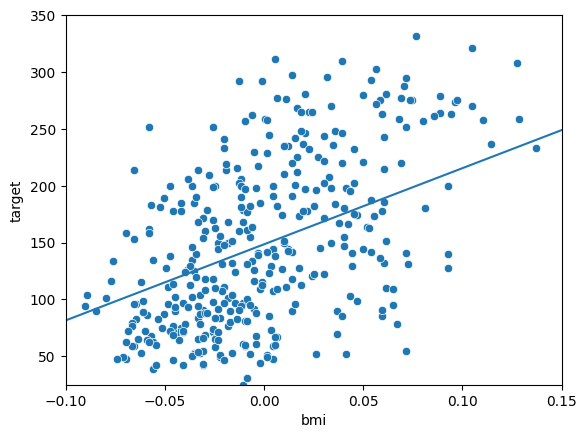

In [127]:
'''
L1-регуляризация линейная (зависимость RMSE от alpha)
'''

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import root_mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X['bmi'], y, test_size=0.2, random_state=42)

model = Lasso(alpha=0).fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))

y_pred_test = model.predict(X_test.to_numpy().reshape(-1, 1))
y_pred_train = model.predict(X_train.to_numpy().reshape(-1, 1))

RMSE_list = [root_mean_squared_error(y_test, y_pred_test)]
alpha_list = []
alpha_min = None
for a in np.linspace(0, 2, 200):
    model = Lasso(alpha=a).fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))
    y_pred_test = model.predict(X_test.to_numpy().reshape(-1, 1))
    RMSE = root_mean_squared_error(y_test, y_pred_test)
    RMSE_list.append(RMSE)
    alpha_list.append(a)
    if RMSE > RMSE_list[-2]:
        alpha_min = a
        break

model = Lasso(alpha=alpha_min).fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))
y_pred_test = model.predict(X_test.to_numpy().reshape(-1, 1))
y_pred_train = model.predict(X_train.to_numpy().reshape(-1, 1))

print(f'RMSE_test: {root_mean_squared_error(y_test, y_pred_test)}')
print(f'RMSE_train: {root_mean_squared_error(y_train, y_pred_train)}')
print(f'R2: {r2_score(y_test, y_pred_test)}')
print(f'MAE_test: {mean_absolute_error(y_test, y_pred_test)}')
print(f'MAE_train: {mean_absolute_error(y_train, y_pred_train)}')

import seaborn as sns

sns.scatterplot(x=X['bmi'], y=y)

l = np.linspace(-1.8, 1.5, 100).reshape(-1, 1)

y_new = model.predict(l)

sns.lineplot(x=l.ravel(), y=y_new.ravel())
plt.xlim(-0.1, 0.15)
plt.ylim(25, 350)